# US Walkability



This project is to show walkability of the walk score data sample provided by walkscore.com of Washington D.C. 

![](score.PNG)

More information can be found at https://www.walkscore.com/how-it-works/

# Data collection
Future project will be using apis to gather locations, geocoding the position (probably google places) then using api to get walk score. Then will be put into a db in the cloud.

Due to time, will us walkscore data provided by a sample of data for Washington DC at https://www.walkscore.com/professional/research.php

In [26]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [27]:
url = "https://docs.google.com/spreadsheets/u/0/d/1hQHrdwGrYmWjuRuCxQ-hmCr51jgZlJ7YLG5y1F1VExg/pub?output=html"

data = pd.read_html(url, header=1)
data = data[0]
print("shape:",data.shape)
data.head()


shape: (65, 23)


,1,Snapped lat,Snapped lon,Walk Score,Walk Score Label,Average Block Length (meters),Average Block Length Score,Intersection Density (inscts/mi^2),Intersection Density Score,Transit Score,...,City Name,City Walk Score,Rail Stops in 0.5mi,Errands Score,Culture Score,Grocery Score,Park Score,Dining and Drinking Score,School Score,Shopping Score
0,2,38.9010,-77.0460,99,Walker's Paradise,104.18,95.82,250.83,83.61,95,...,Washington D.C.,73.2,3,100.00,93.45,97.89,100.0,100.00,99.67,99.63
1,3,38.9115,-77.0355,97,Walker's Paradise,97.10,100.00,287.75,95.92,92,...,Washington D.C.,73.2,1,97.70,78.34,100.00,100.0,99.50,94.49,98.15
2,4,38.9040,-77.0250,98,Walker's Paradise,100.95,99.05,247.01,82.34,100,...,Washington D.C.,73.2,5,99.98,97.27,95.08,100.0,99.77,97.74,95.49
3,5,38.8995,-77.0385,99,Walker's Paradise,120.64,79.36,184.62,61.54,98,...,Washington D.C.,73.2,3,100.00,94.35,98.72,100.0,99.98,100.00,96.78
4,6,38.9100,-77.0475,100,Walker's Paradise,98.83,100.00,255.92,85.31,85,...,Washington D.C.,73.2,1,98.91,94.89,100.00,100.0,100.00,100.00,99.20


In [28]:
data.dtypes

1                                       int64
Snapped lat                           float64
Snapped lon                           float64
Walk Score                              int64
Walk Score Label                       object
Average Block Length (meters)         float64
Average Block Length Score            float64
Intersection Density (inscts/mi^2)    float64
Intersection Density Score            float64
Transit Score                           int64
Transit Score Label                    object
Bike Score                              int64
Bike Score Label                       object
City Name                              object
City Walk Score                       float64
Rail Stops in 0.5mi                     int64
Errands Score                         float64
Culture Score                         float64
Grocery Score                         float64
Park Score                            float64
Dining and Drinking Score             float64
School Score                      

In [29]:
scores = data[["Walk Score","Transit Score","Bike Score","Intersection Density Score","Errands Score","Culture Score", "Grocery Score","Park Score", "Dining and Drinking Score", "School Score", "Rail Stops in 0.5mi"]]
# general stats of the scores
scores.describe()


,Walk Score,Transit Score,Bike Score,Intersection Density Score,Errands Score,Culture Score,Grocery Score,Park Score,Dining and Drinking Score,School Score,Rail Stops in 0.5mi
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,91.569231,87.538462,81.800000,66.571231,92.184154,82.716769,92.972615,99.304923,94.439385,95.236308,2.000000
std,14.177413,11.878390,11.770195,18.507362,16.659978,27.336466,13.169928,4.956029,13.203746,9.540464,1.862458
min,15.000000,60.000000,31.000000,30.560000,6.590000,0.000000,15.760000,60.340000,17.060000,57.170000,0.000000
25%,89.000000,77.000000,78.000000,53.050000,94.210000,80.630000,93.610000,100.000000,94.350000,97.010000,1.000000
50%,97.000000,90.000000,84.000000,64.090000,99.570000,94.350000,97.400000,100.000000,99.390000,99.390000,1.000000
75%,99.000000,98.000000,89.000000,83.180000,100.000000,99.710000,99.760000,100.000000,100.000000,100.000000,3.000000
max,100.000000,100.000000,95.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,7.000000


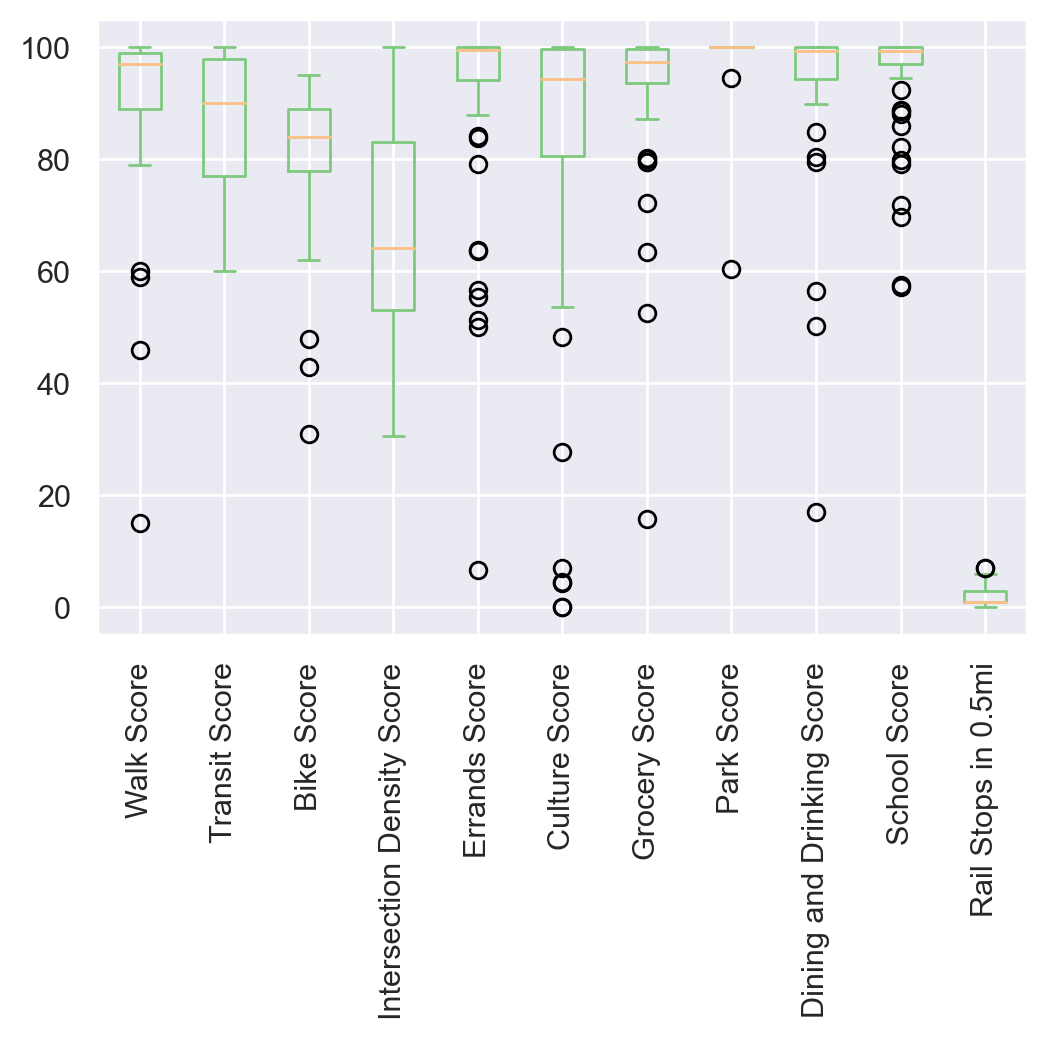

In [30]:
scores.plot.box()
plt.xticks(rotation=90)
plt.show()

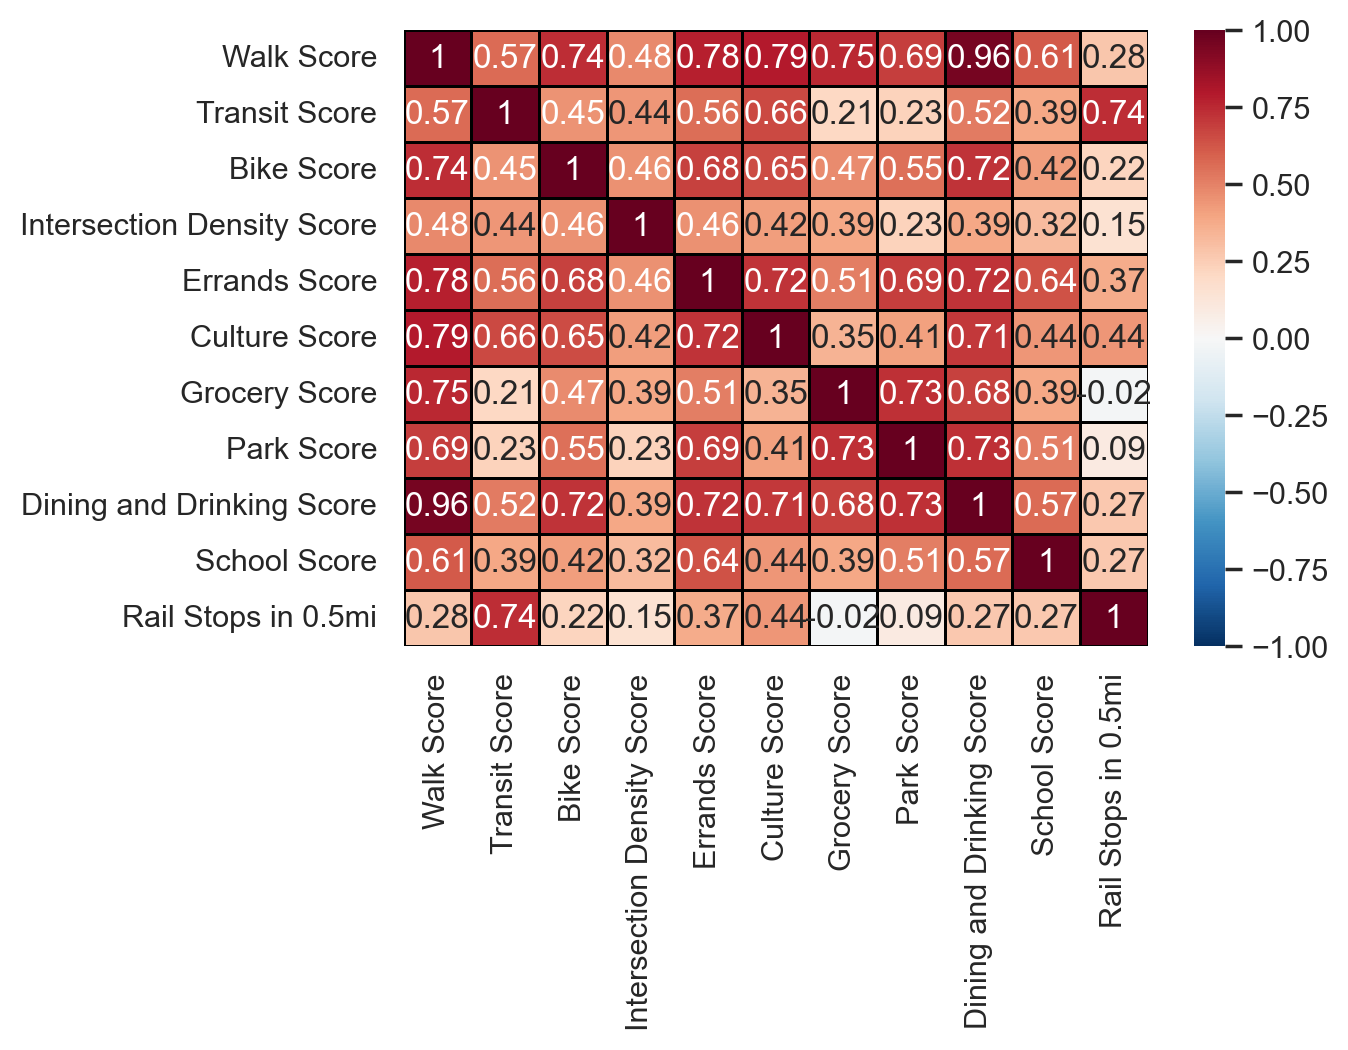

In [31]:
sns.set(rc={'figure.dpi':200, 'figure.figsize':(6,4)})
sns.set(style="darkgrid", palette="Accent")
sns.heatmap(np.round(scores.corr(),2),
    annot=True,
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,
    linewidth=1,
    linecolor="black"
);

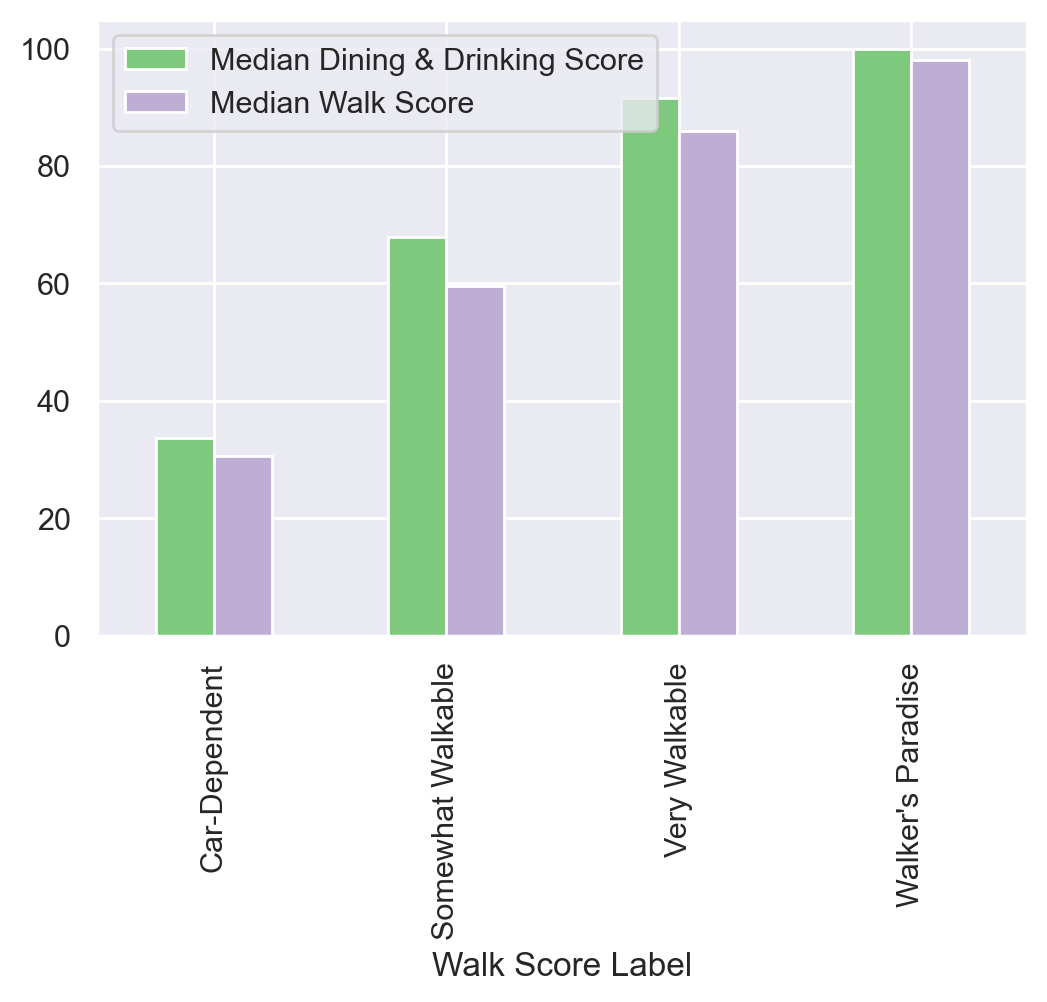

In [32]:

data.groupby("Walk Score Label")[["Dining and Drinking Score","Walk Score"]].agg({'median'}).plot.bar()
plt.legend(["Median Dining & Drinking Score", "Median Walk Score"])
plt.show()

In [33]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(data_ohe.drop("Walk Score", axis=1), data_ohe["Walk Score"], test_size=0.2)
print("Training explanatory variables:", x_train.shape)
print("Testing explanatory variables:", x_test.shape)

Training explanatory variables: (52, 26)
Testing explanatory variables: (13, 26)


In [35]:

model = sm.OLS(y_train, sm.add_constant(x_train))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Walk Score   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     785.5
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.31e-32
Time:                        22:32:31   Log-Likelihood:                -43.341
No. Observations:                  52   AIC:                             136.7
Df Residuals:                      27   BIC:                             185.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
1                                       -0.0107      0.008     -1.337      0.192      -0.027       0.006
Snapped lat                            -44.9625     28.608     -1.572      0.128    -103.662      13.737
Snapped lon                              9.4116     14.952      0.629      0.534     -21.268      40.091
Average Block Length (meters)            0.4180      0.272      1.538      0.136      -0.140       0.976
Average Block Length Score               0.3630      0.262      1.387      0.177      -0.174       0.900
Intersection Density (inscts/mi^2)       0.8009      0.537      1.492      0.147      -0.300       1.902
Intersection Density Score              -2.3606      1.604     -1.472      0.153      -5.651       0.930
Transit Score                           -0.0335      0.038     -0.881      0.386      -0.111       0.045
Bike Score                               0.0295      0.044      0.677      0.504      -0.060       0.119
City Walk Score                         32.8438     13.780      2.384      0.024       4.570      61.117
Rail Stops in 0.5mi                     -0.0800      0.126     -0.636      0.530      -0.338       0.178
Errands Score                            0.0824      0.026      3.152      0.004       0.029       0.136
Culture Score                            0.0642      0.011      6.097      0.000       0.043       0.086
Grocery Score                            0.2680      0.031      8.531      0.000       0.204       0.332
Park Score                              -0.2094      0.124     -1.688      0.103      -0.464       0.045
Dining and Drinking Score                0.2994      0.092      3.272      0.003       0.112       0.487
School Score                             0.0776      0.044      1.748      0.092      -0.013       0.169
Shopping Score                           0.2981      0.034      8.791      0.000       0.229       0.368
Walk Score Label_Somewhat Walkable       9.1320      4.965      1.839      0.077      -1.056      19.320
Walk Score Label_Very Walkable           1.4898      1.810      0.823      0.418      -2.225       5.204
Walk Score Label_Walker's Paradise       1.6842      2.024      0.832      0.413      -2.469       5.837
Transit Score Label_Good Transit         0.2793      0.997      0.280      0.781      -1.765       2.324
Transit Score Label_Rider's Paradise     0.3168      0.615      0.515      0.610      -0.944       1.578
Bike Score Label_Biker's Paradise       -0.2880      1.215     -0.237      0.814      -2.781       2.205
Bike Score Label_Somewhat Bikeable      -2.7253      3.700     -0.737      0.468     -10.318       4.867
Bike Score Label_Very Bikeable           0.1279      0.862      0.148      0.883      -1.642       1.897
======================================

In [36]:

color_scale = [(0, "red"), (1, "green")]

walk_fig = px.scatter_mapbox(
    data,
    lat="Snapped lat",
    lon="Snapped lon",
    color="Walk Score",
    color_continuous_scale=color_scale,
    size="Walk Score",
    zoom=10,
    height=800,
    width=800,

)


In [37]:
walk_fig.update_layout(mapbox_style="carto-positron")
walk_fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
walk_fig.show()

In [38]:
import os
mapbox_key = os.getenv("MAPBOX")
px.set_mapbox_access_token(mapbox_key)

In [39]:

fig = px.scatter_mapbox(data,
    lat="Snapped lat",
    lon="Snapped lon",
    color="Transit Score",
    hover_data=scores,
    zoom=10,
    mapbox_style="dark"
)
fig.show()

# Business understanding
- Finding where walking and public transit infrastructure is lacking to target in public projects
- Buying real estate in well connected and walkable places
- Comparing between states and cities 
- Other data that is included that give which to focus on
- Data is there, better to display